Capstone

In [9]:
#Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
#Creating Common Function to show full values on plots
def set_pd_display():
    pd.set_option('display.float_format', '{:.6f}'.format)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)

set_pd_display()




In [11]:
#Loading Dataset
df=pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
#Important Feature Extraction
df[['Car_Name','Model','Type']]=df['name'].str.split(n=2,expand=True)


In [13]:
#Checking Dataframe Shape
df.shape

(4340, 11)

In [14]:
# Dropping the 'name' column after extracting features
df.drop(columns=['name'], inplace=True)


In [15]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Name,Model,Type
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,1.6 SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,T Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,VX i-DTEC


In [16]:
#Checking Null Values
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Car_Name         0
Model            0
Type             1
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
#Checking Duplicates
df.duplicated().sum()

763

In [19]:
#Duplicate %
a=763/4340*100
print(a)

#Dropping Duplicates
df.drop_duplicates(inplace=True)


17.580645161290324


In [20]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Car_Name', 'Model', 'Type'],
      dtype='object')

In [21]:
# Loop through columns and print value counts for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print()  # Print a blank line for separation

Value counts for column 'fuel':
fuel
Diesel      1800
Petrol      1716
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

Value counts for column 'seller_type':
seller_type
Individual          2831
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64

Value counts for column 'transmission':
transmission
Manual       3264
Automatic     312
Name: count, dtype: int64

Value counts for column 'owner':
owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      74
Test Drive Car            17
Name: count, dtype: int64

Value counts for column 'Car_Name':
Car_Name
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun            

In [22]:
def replace_with_others(df, column_name, threshold):
    
    # Calculate the value counts of the column
    value_counts = df[column_name].value_counts()
    
    # Identify categories to be replaced with 'Others'
    to_replace = value_counts[value_counts < 49].index
    
    # Replace the identified categories with 'Others'
    df[column_name] = df[column_name].apply(lambda x: 'Others' if x in to_replace else x)
    
    return df[column_name]


In [23]:
replace_with_others(df,'Car_Name',threshold=49).value_counts()

Car_Name
Maruti        1072
Hyundai        637
Mahindra       328
Tata           308
Ford           220
Honda          216
Others         170
Toyota         170
Chevrolet      151
Renault        110
Volkswagen      93
Nissan          52
Skoda           49
Name: count, dtype: int64

In [24]:
df['Type'].value_counts()

Type
Dzire VDI                                         54
LX                                                51
800 LXI                                           48
LXi                                               44
VDI                                               37
VDI BSIV                                          28
Era Plus                                          28
VXI                                               26
R VXI BS IV                                       26
VDi                                               22
R LXI Minor                                       21
Xing GLS                                          20
AC                                                20
K10 VXI                                           20
RXT                                               18
Magna Plus                                        17
W8 2WD                                            16
LT                                                16
Sportz 1.2                               

In [25]:
df['Type'].nunique()

1387

In [26]:
replace_with_others(df,'Type',threshold=11).value_counts()

Type
Others       3471
Dzire VDI      54
LX             51
Name: count, dtype: int64

EDA

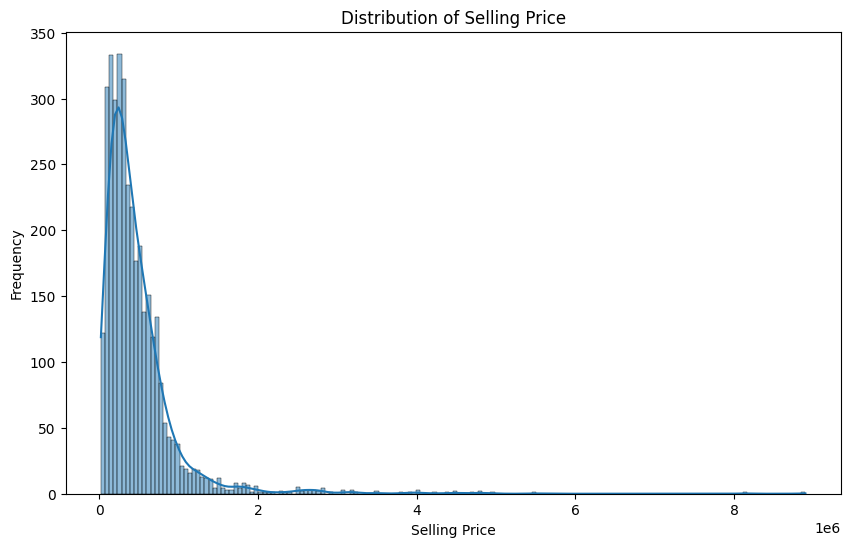

In [27]:
# Checking Distribution of selling price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

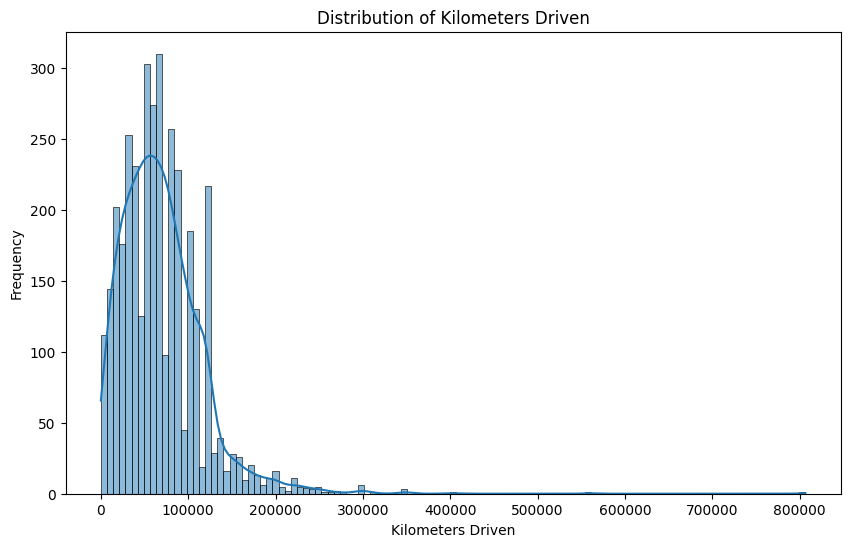

In [28]:
# Checking Distribution of kilometers driven
plt.figure(figsize=(10, 6))
sns.histplot(df['km_driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

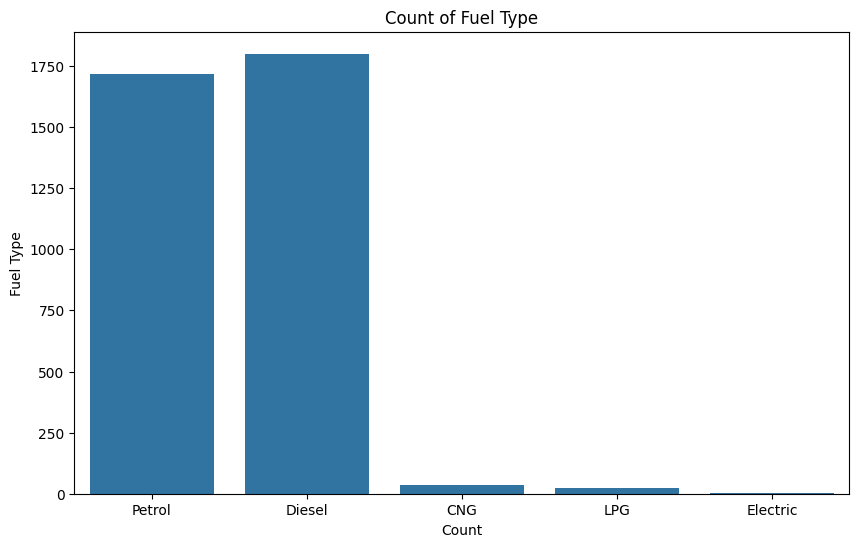

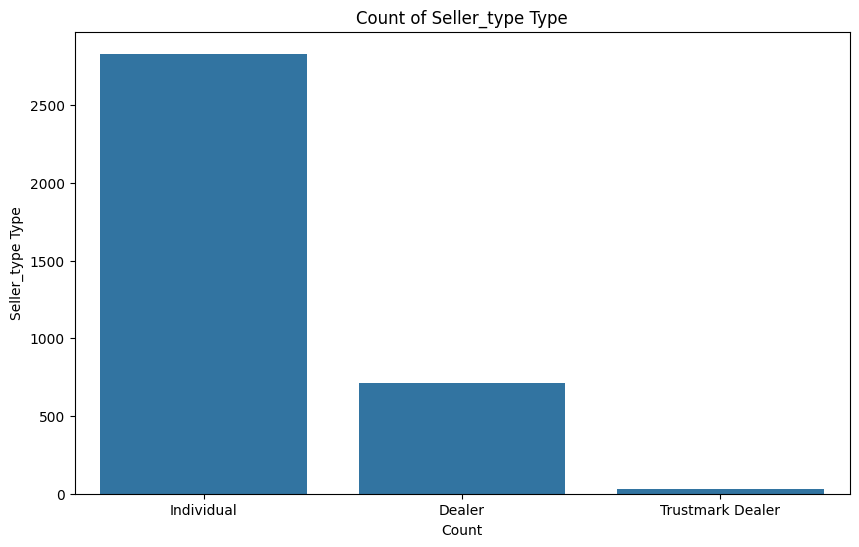

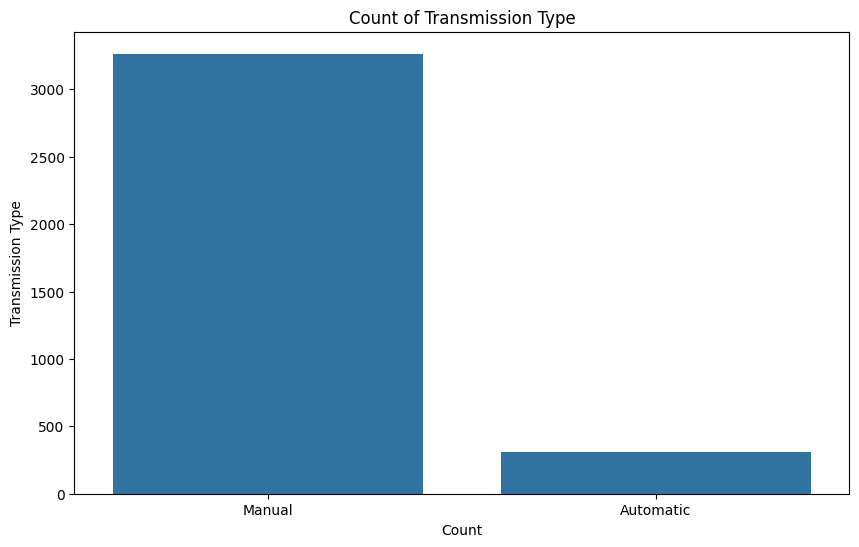

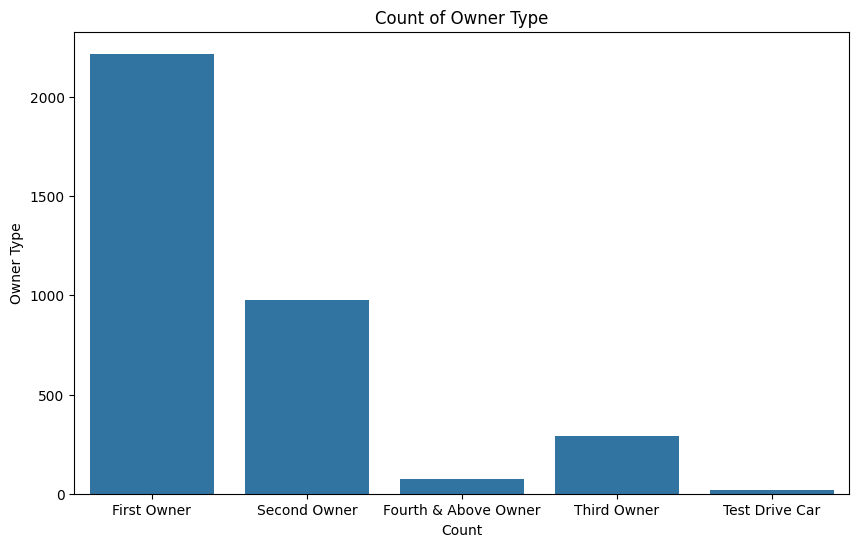

In [29]:
# Columns For countplot
columns = ['fuel', 'seller_type', 'transmission', 'owner']

# Loop through each column and create a count plot
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Count of {column.capitalize()} Type')
    plt.xlabel('Count')
    plt.ylabel(f'{column.capitalize()} Type')
    plt.show()

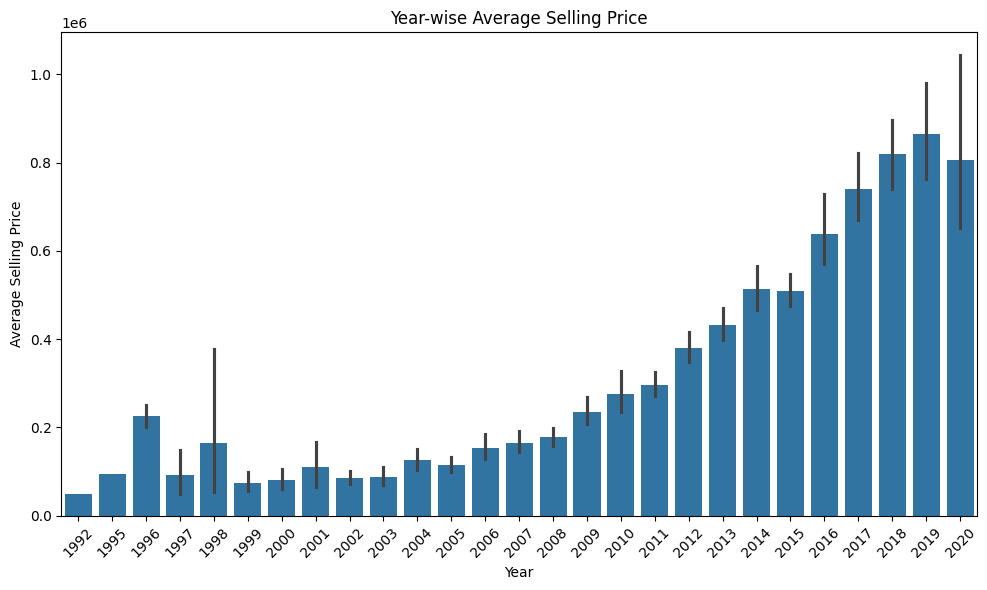

In [30]:
# Year-wise average selling price
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='selling_price', data=df, estimator=np.mean)
plt.title('Year-wise Average Selling Price')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

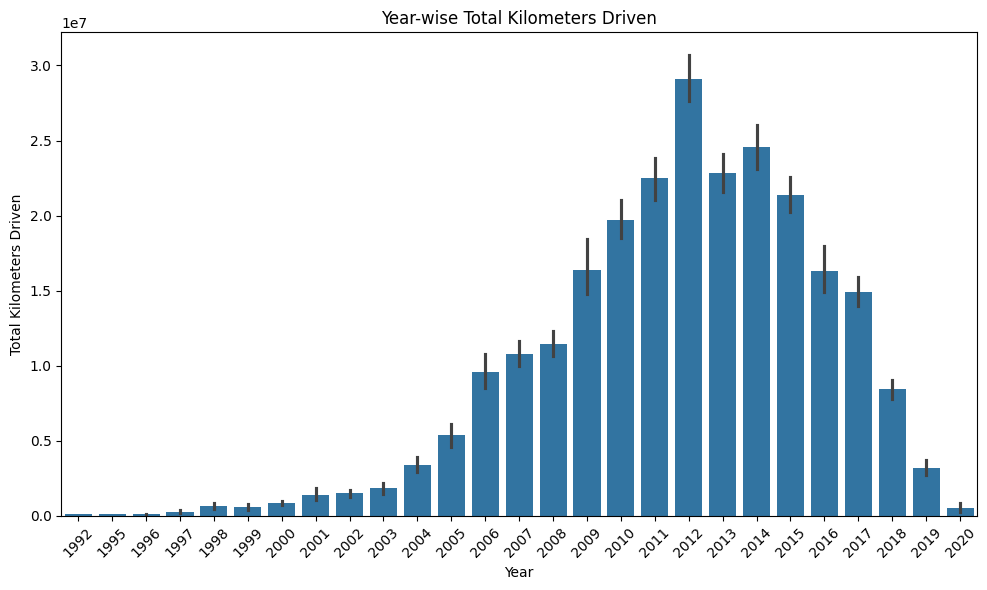

In [31]:
# Year-wise total kilometers driven
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='km_driven', data=df, estimator=np.sum)
plt.title('Year-wise Total Kilometers Driven')
plt.xlabel('Year')
plt.ylabel('Total Kilometers Driven')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

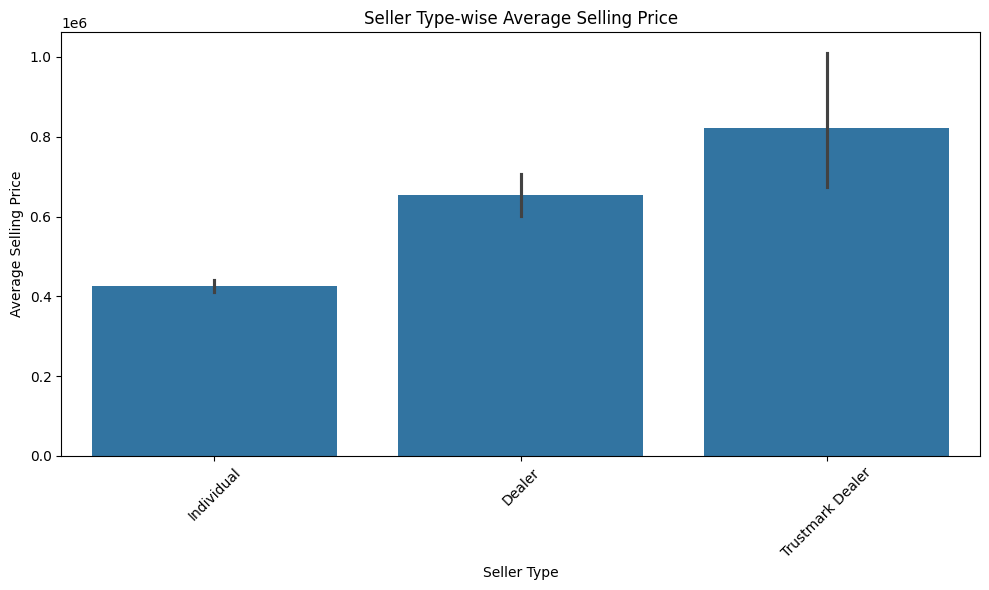

In [32]:
# Seller type-wise average selling price
plt.figure(figsize=(10, 6))
sns.barplot(x='seller_type', y='selling_price', data=df, estimator=np.mean)
plt.title('Seller Type-wise Average Selling Price')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


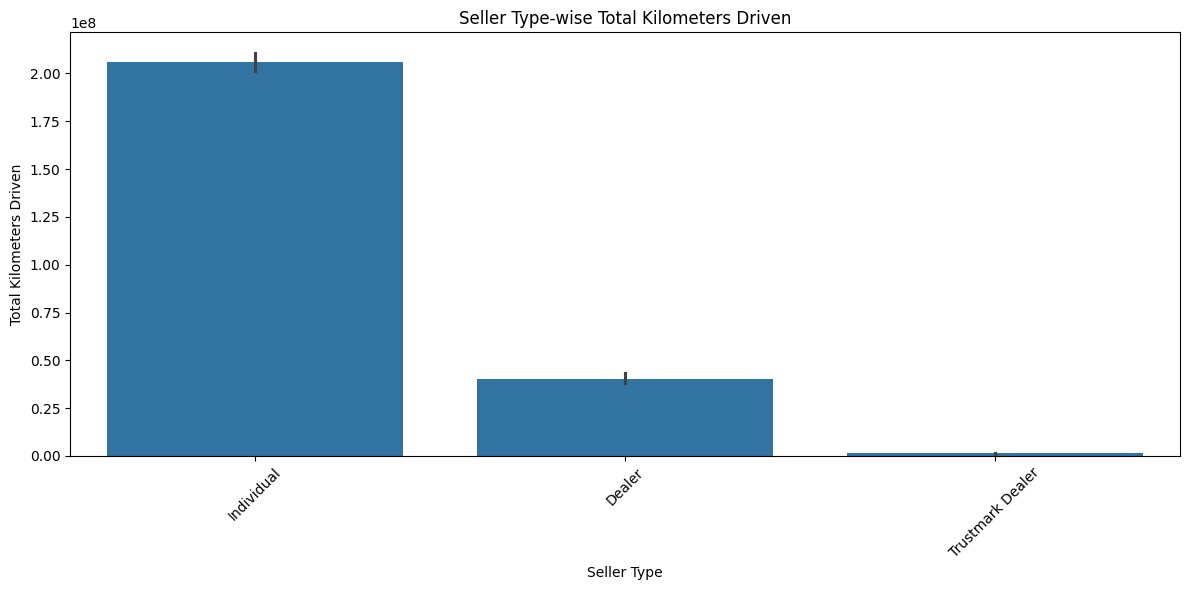

In [33]:
# Seller type-wise total kilometers driven
plt.figure(figsize=(12, 6))
sns.barplot(x='seller_type', y='km_driven', data=df, estimator=np.sum)
plt.title('Seller Type-wise Total Kilometers Driven')
plt.xlabel('Seller Type')
plt.ylabel('Total Kilometers Driven')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

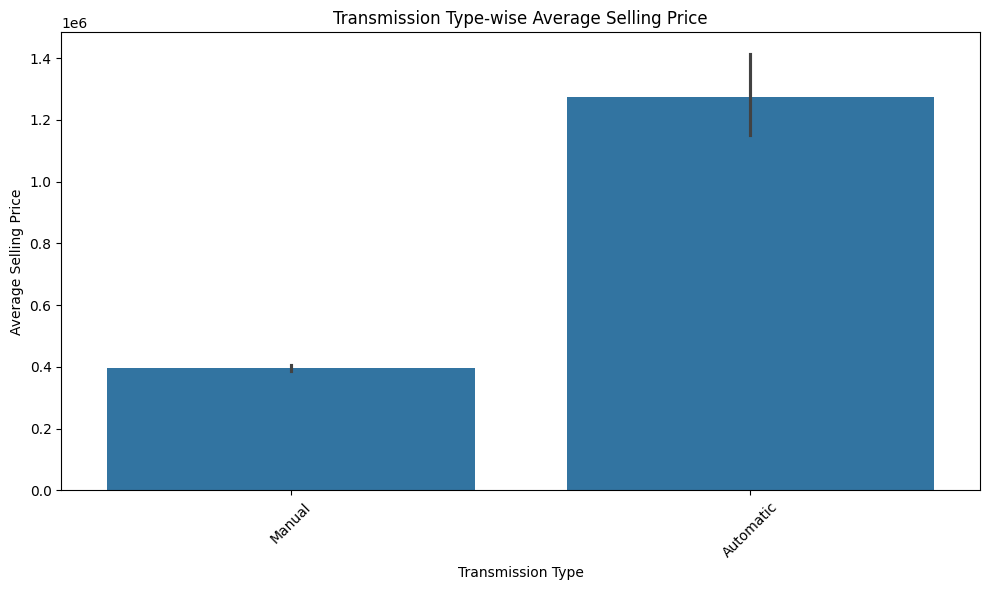

In [34]:
# Transmission type-wise average selling price
plt.figure(figsize=(10, 6))
sns.barplot(x='transmission', y='selling_price', data=df, estimator=np.mean)
plt.title('Transmission Type-wise Average Selling Price')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

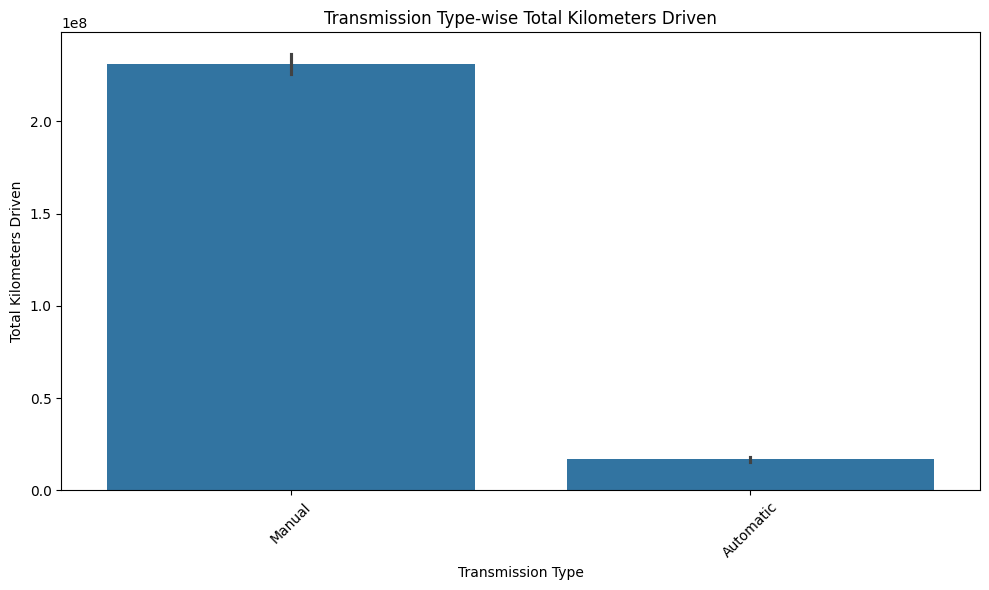

In [35]:
# Transmission type-wise total kilometers driven
plt.figure(figsize=(10, 6))
sns.barplot(x='transmission', y='km_driven', data=df, estimator=np.sum)
plt.title('Transmission Type-wise Total Kilometers Driven')
plt.xlabel('Transmission Type')
plt.ylabel('Total Kilometers Driven')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

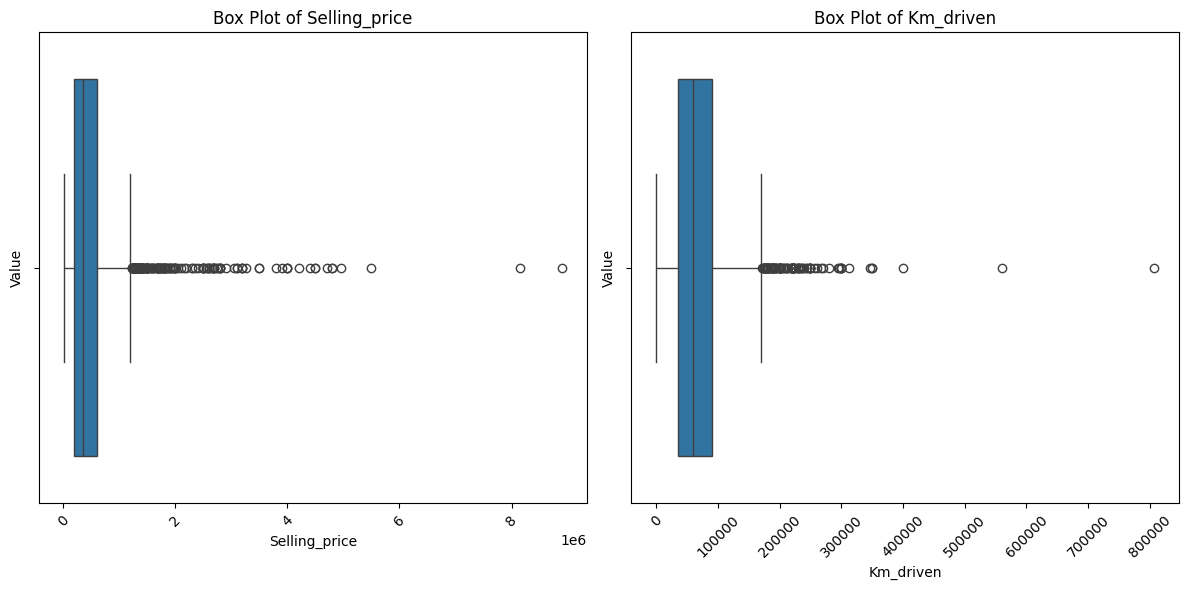

In [36]:
# Detecting Outliers
numerical_columns = ['selling_price', 'km_driven']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(12, 6))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column.capitalize()}')
    axes[i].set_xlabel(f'{column.capitalize()}')
    axes[i].set_ylabel('Value')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [37]:
#Checking Quartiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3576.000000,2012.965045,4.249710,1992.000000,2010.000000,2013.000000,2016.000000,2020.000000
selling_price,3576.000000,474005.358781,509342.777897,20000.000000,200000.000000,350000.000000,600000.000000,8900000.000000
km_driven,3576.000000,69249.497204,47586.552758,1.000000,36000.000000,60000.000000,90000.000000,806599.000000


In [38]:
#Outliers Treatment
df[numerical_columns].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
selling_price,3576.000000,474005.358781,509342.777897,20000.000000,350000.000000,1200000.000000,1300000.000000,1497500.000000,1800000.000000,2675000.000000,8900000.000000
km_driven,3576.000000,69249.497204,47586.552758,1.000000,60000.000000,149543.500000,158000.000000,170000.000000,193500.000000,223165.000000,806599.000000


In [39]:
#Checking records beyond given condition
print(df[df['selling_price']>2675000].shape)
print(df[df['km_driven']>223158.400000].shape)

(35, 10)
(36, 10)


In [40]:
df['selling_price']=np.where(df['selling_price']>2675000,2675000,df['selling_price'])
df['km_driven']=np.where(df['km_driven']>223158.400000,223158.400000,df['km_driven'])

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3576.000000,2012.965045,4.249710,1992.000000,2010.000000,2013.000000,2016.000000,2020.000000
selling_price,3576.000000,462182.092562,417345.969151,20000.000000,200000.000000,350000.000000,600000.000000,2675000.000000
km_driven,3576.000000,68548.615045,43394.711614,1.000000,36000.000000,60000.000000,90000.000000,223158.400000


In [42]:
df1=df.copy()

In [43]:
#Columns Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [44]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Car_Name', 'Model', 'Type'],
      dtype='object')

In [45]:
cols_for_encoding=df[['year','seller_type','transmission','owner','Car_Name','Model','Type','fuel']]
for i in cols_for_encoding:
    df[i]=lb.fit_transform(df[i])

In [46]:
df.dtypes

year               int64
selling_price      int64
km_driven        float64
fuel               int32
seller_type        int32
transmission       int32
owner              int32
Car_Name           int32
Model              int32
Type               int32
dtype: object

In [47]:
#Selecting X and Y
x=df.drop('selling_price',axis=1)
y=df['selling_price']
print(x.shape)
print(y.shape)

(3576, 9)
(3576,)


In [48]:
#Data Splitting
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=80)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2682, 9)
(894, 9)
(2682,)
(894,)


In [49]:
#Creating function for evaluation
from sklearn.metrics import *

In [50]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    Train_score=model.score(x_train,y_train)
    Test_score=model.score(x_test,y_test)
    Test_mse=mean_squared_error(y_test,ypred)
    Test_rmse=np.sqrt(Test_mse)
    Test_mae=mean_absolute_error(y_test,ypred)
    res=pd.DataFrame({'Train_Score':Train_score,'Test_Score':Test_score,'Test_Mae':Test_mae,'Test_rmse':Test_rmse,
                      },index=[mname])
    return res

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
#Linear Reg
LR=LinearRegression()
LR_Res=eval_model(LR,x_train,x_test,y_train,y_test,'LR')
LR_Res

,Train_Score,Test_Score,Test_Mae,Test_rmse
LR,0.504984,0.534298,200007.776498,317713.176788


In [53]:
#Decision Tree
DT=DecisionTreeRegressor(max_depth=10,min_samples_split=10)
DT_Res=eval_model(DT,x_train,x_test,y_train,y_test,'DT')
DT_Res

,Train_Score,Test_Score,Test_Mae,Test_rmse
DT,0.876725,0.695800,141871.458676,256779.743638


In [70]:
#Random Forest
RF=RandomForestRegressor(n_estimators=120,max_depth=18,min_samples_split=30)
RF_Res=eval_model(RF,x_train,x_test,y_train,y_test,'RF')
RF_Res

,Train_Score,Test_Score,Test_Mae,Test_rmse
RF,0.804183,0.774897,129263.559904,220887.912113


In [71]:
all_res=pd.concat([LR_Res,DT_Res,RF_Res])
all_res

,Train_Score,Test_Score,Test_Mae,Test_rmse
LR,0.504984,0.534298,200007.776498,317713.176788
DT,0.876725,0.695800,141871.458676,256779.743638
RF,0.804183,0.774897,129263.559904,220887.912113


In [72]:
RF_FINAL=RF
RF.fit(x,y)

RandomForestRegressor(max_depth=18, min_samples_split=30, n_estimators=120)

In [73]:
RF.predict(x_test)

array([ 635765.94403064,  714660.67612394,  903709.12157308,
        120497.01788845,  689408.60461275,  608707.54178385,
        120031.94112699,  297483.74750323,  636291.9941976 ,
        885894.8742038 ,  304863.62423374,  144446.00598621,
        714605.70587005,  888183.16023538,  693546.35008192,
        423801.50307585, 1593820.61590358, 2257894.45211161,
        266243.52111521,  286132.47466608,   59024.94158915,
        193899.37018689,  700681.51715309,  696060.55439707,
        134047.51662888, 1412214.94927595,  655382.4671141 ,
        351701.19768405,  139527.99428321,  179246.71278149,
        210832.67686968,   96691.7739343 ,  778331.774443  ,
        651312.48624662,  322940.45219302,  311837.02653111,
        448666.38883254,   75751.21221658,  587693.92607229,
        105216.02361142,  315028.77107354,  105411.99124051,
        444011.56586876,  252994.04022767,  108567.65087077,
        181598.02239237,  204187.25461587,  653390.22075339,
        433919.70066463,

In [75]:
Random_Sample_20=df.sample(n=20)
Random_Sample_20.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Name,Model,Type
4134,21,350000,90000.000000,1,1,1,0,5,146,2
1767,21,850000,55000.000000,1,1,1,0,4,173,2
40,25,1400000,10000.000000,4,1,1,0,7,41,2
1563,16,170000,50000.000000,4,1,1,2,3,135,2
149,8,65000,70000.000000,4,1,1,0,3,135,2


In [78]:
#Generating Predictions on Random Samples
print(Random_Sample_20.shape)
Random_Sample_20=df.drop(columns=['selling_price'])
predictions=RF.predict(Random_Sample_20)
predictions


(20, 10)


array([ 87326.58606454, 125406.7799885 , 466887.83609776, ...,
       124875.53042999, 735505.13832289, 267411.7802655 ])

In [80]:
#DataFrame and Model Saving
import pickle
pickle.dump(RF_FINAL,open('RF_final_03-05-2024.pkl','wb'))
pickle.dump(df1,open('df1_03-05-2024.pkl','wb'))